In [31]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# IMAGE RESIZEING & PIXEL NORMALIZATION

nilai pixel terkecil sebelum di normalisasi : 15
nilai pixel terbesar sebelum di normalisasi : 243

nilai pixel terkecil setelah di normalisasi : 0.058823529411764705
nilai pixel terbesar setelah di normalisasi : 0.9529411764705882


(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

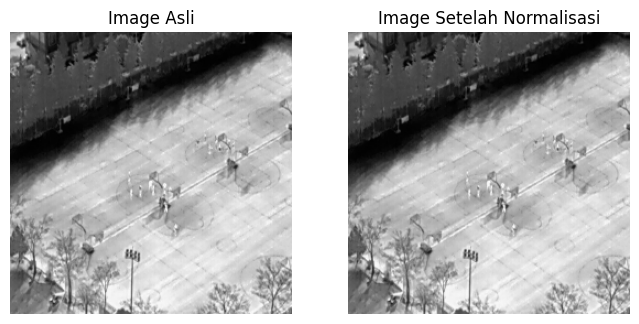

In [35]:
img = cv2.imread("images-for-test/0_60_30_0_01609.jpg", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (256, 256)) # resize image ke ukuran 256x256 pixel
print(f"nilai pixel terkecil sebelum di normalisasi : {img.min()}")
print(f"nilai pixel terbesar sebelum di normalisasi : {img.max()}")


img_norm = img / 255.0
print(f"\nnilai pixel terkecil setelah di normalisasi : {img_norm.min()}")
print(f"nilai pixel terbesar setelah di normalisasi : {img_norm.max()}")


# menampilkan gambar asli dan gambar hasil normalisasi
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title("Image Asli")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Image Setelah Normalisasi")
plt.imshow(img_norm, cmap='gray')
plt.axis('off')

# NOICE REDUCTION

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

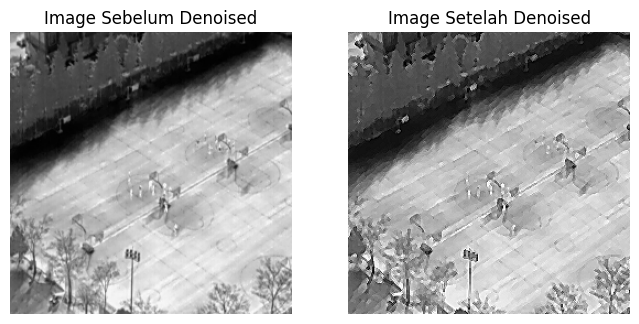

In [39]:
# median blur untuk mengurangi noise bintik, tapi tetap menjaga tepi gambar
# (gambar dinormalisasi → dikali 255 agar bisa diproses openCV → balik lagi ke 0-1)
img_med = cv2.medianBlur((img_norm * 255).astype('uint8'), 3) / 255.0

# kernel penajaman (sharpen)
kernel = np.array([[0,-1,0],
                   [-1,5,-1],
                   [0,-1,0]])

# filter sharpening untuk menajamkan gambar
# setelah median blur membuat gambar sedikit halus, langkah ini balikin ketajaman
img_denoised = cv2.filter2D((img_med*255).astype('uint8'), -1, kernel) / 255.0


# tampilkan gambar sebelum dan sesudah denoising
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title("Image Sebelum Denoised")
plt.imshow(img_norm, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Image Setelah Denoised")
plt.imshow(img_denoised, cmap='gray')
plt.axis('off')
